In [1]:
from rocketpy.Function import Function, PiecewiseFunction
import numpy as np

In [2]:
tank_geometry = {(0, 1): lambda y: np.sqrt(1 ** 2 - (1 - y) ** 2), (1, 2): lambda y: 1, (2, 3): lambda y: np.sqrt(1 ** 2 - (y - 2) ** 2)}

In [3]:
tank_rad = PiecewiseFunction(tank_geometry)

<function <lambda> at 0x7f9bfc5ba050>
<function <lambda> at 0x7f9c0517fa30>
<function <lambda> at 0x7f9c0517f910>


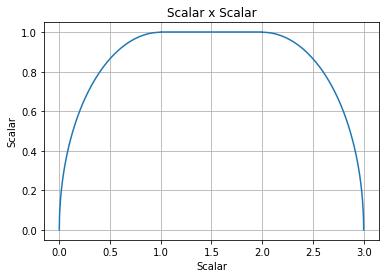

In [4]:
fig, ax = tank_rad.plot1D(returnObject=True)